In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("ventas_totales_cleaned.csv")


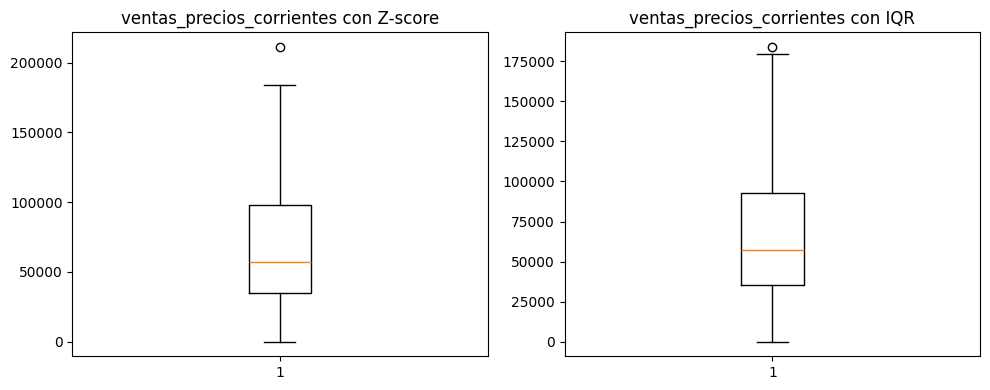

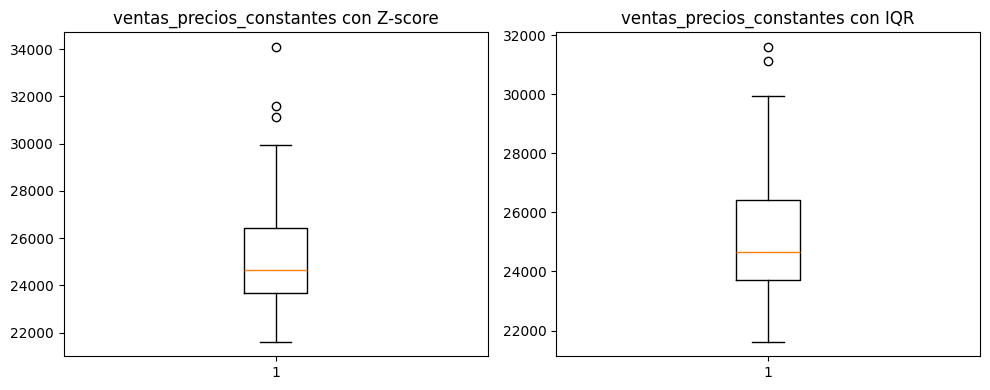

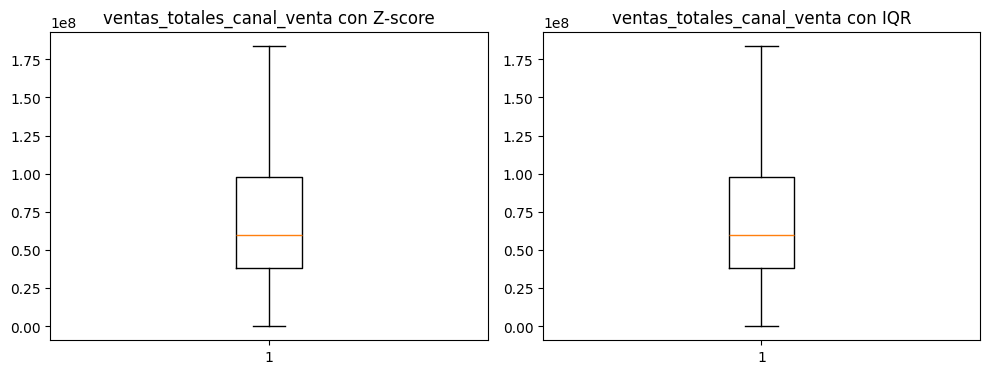

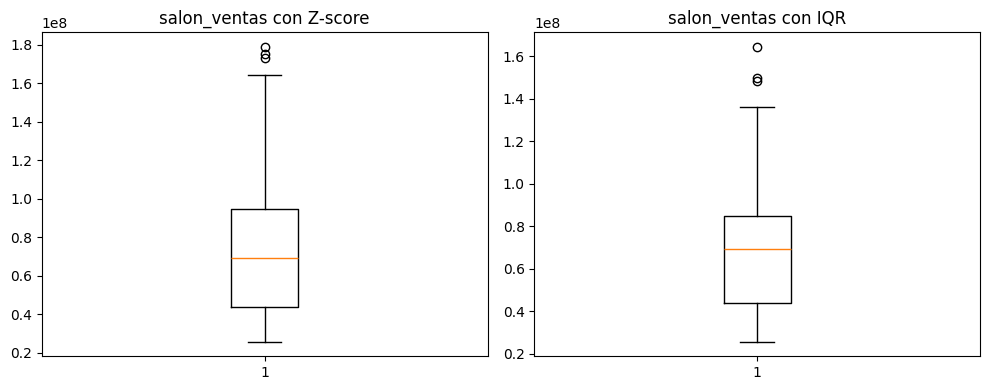

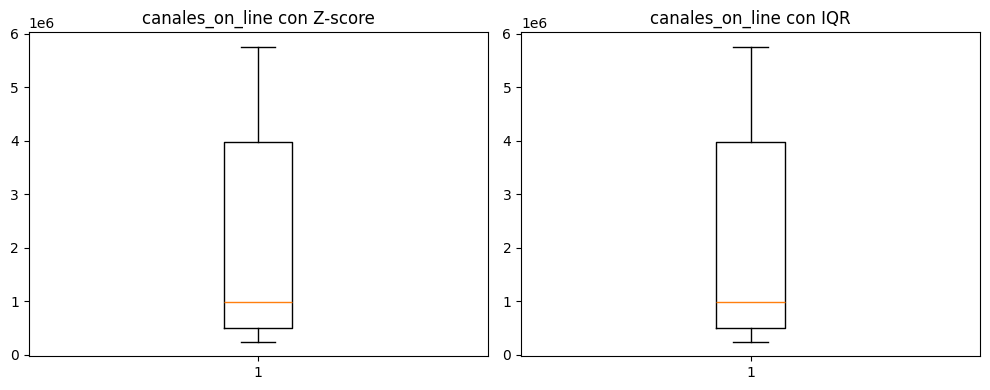

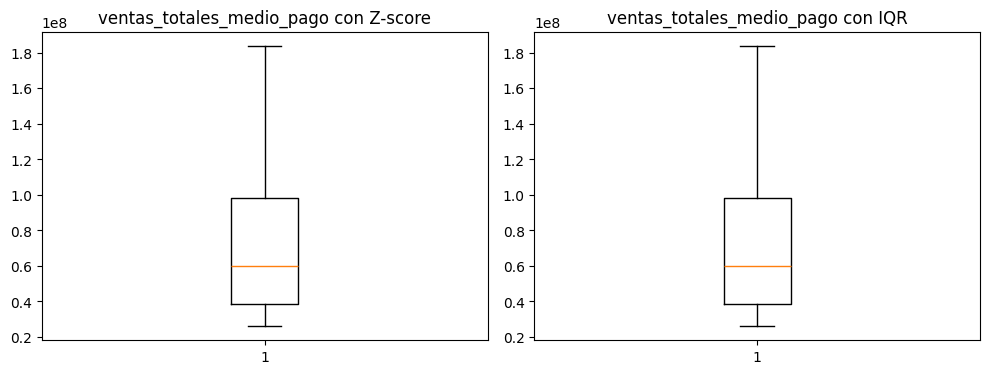

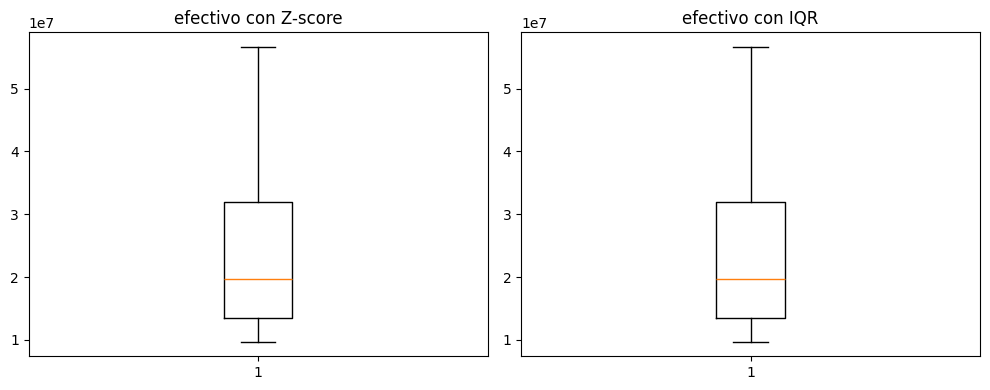

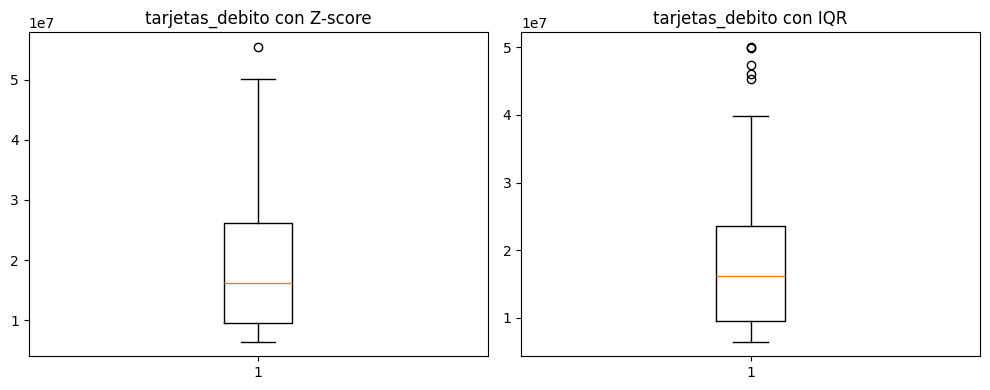

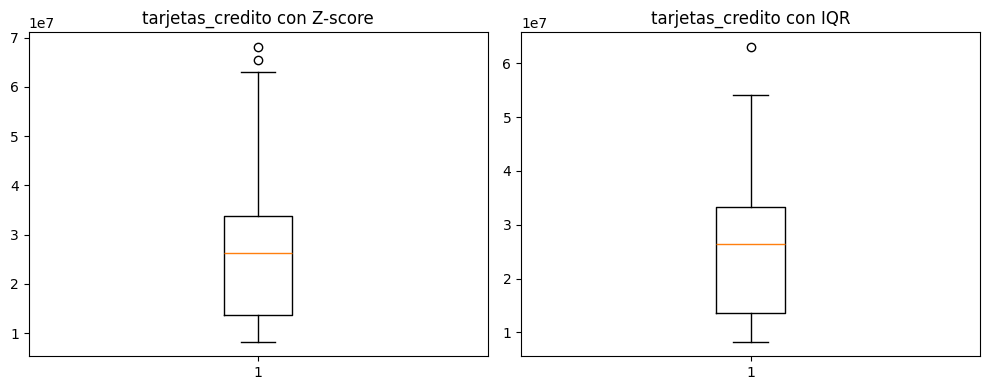

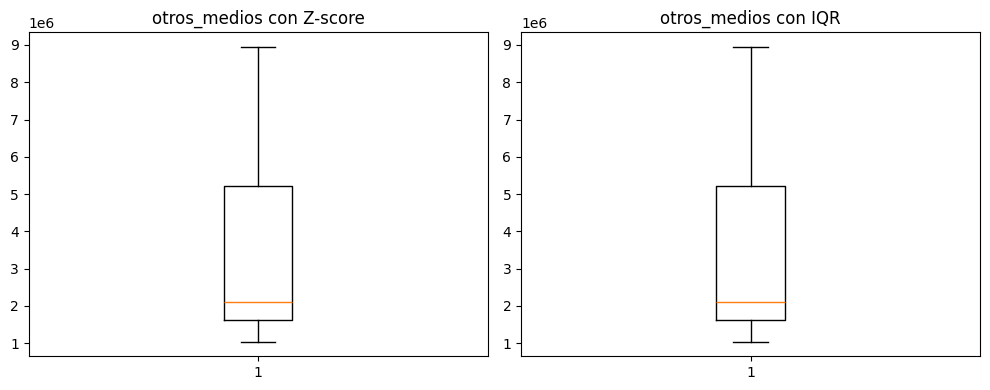

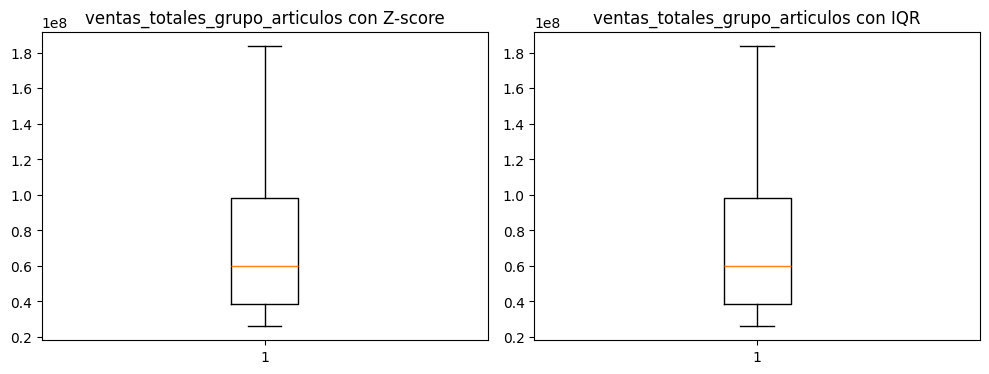

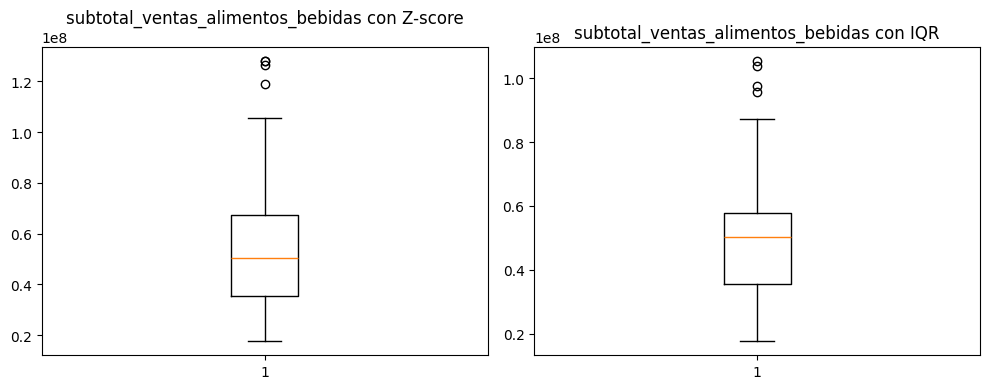

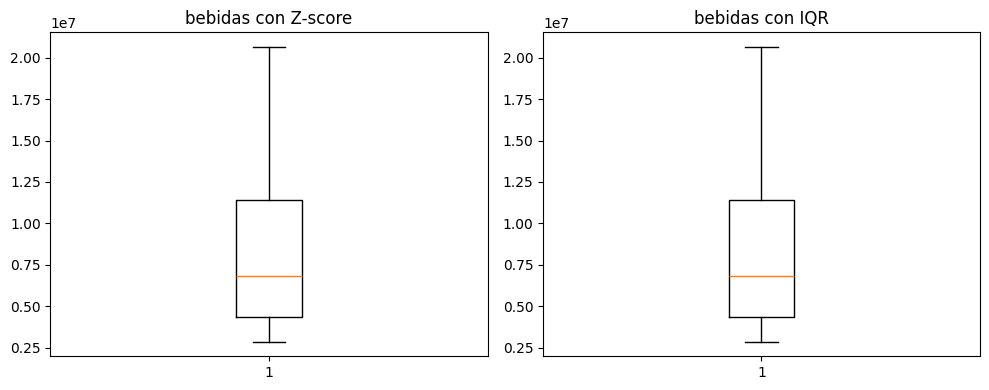

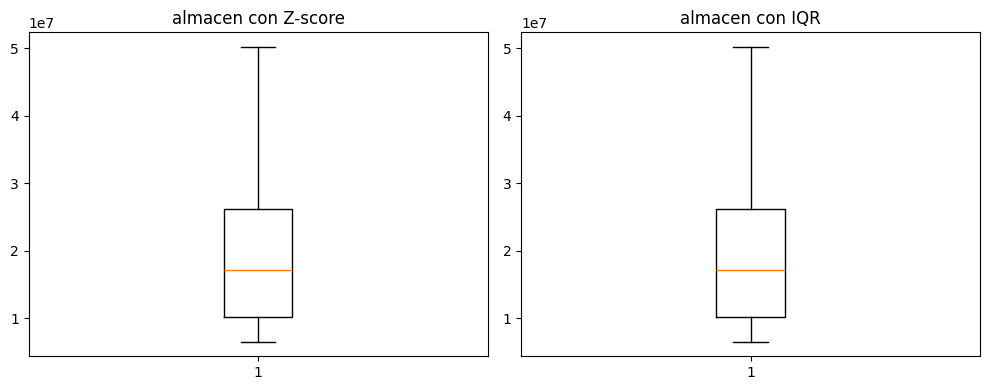

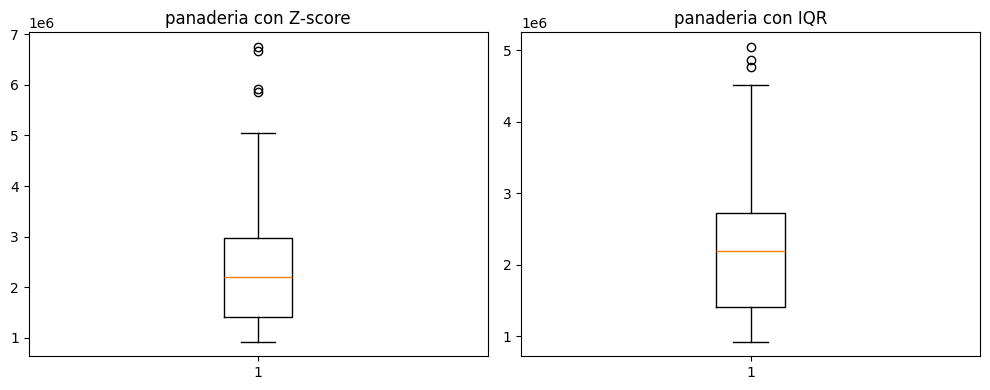

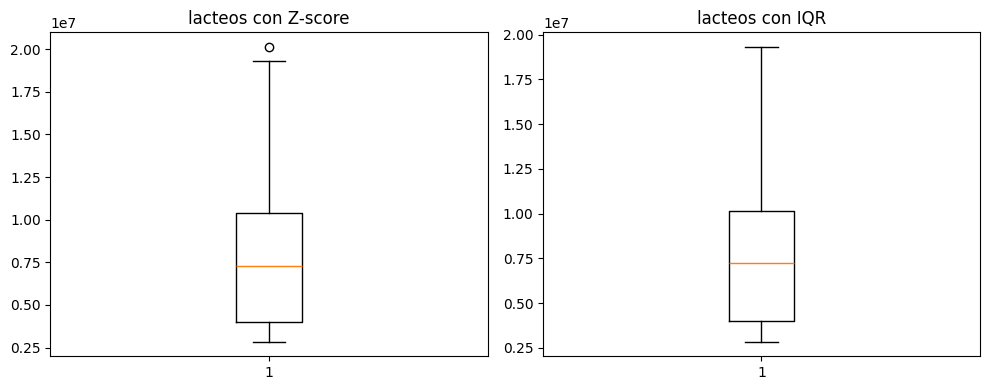

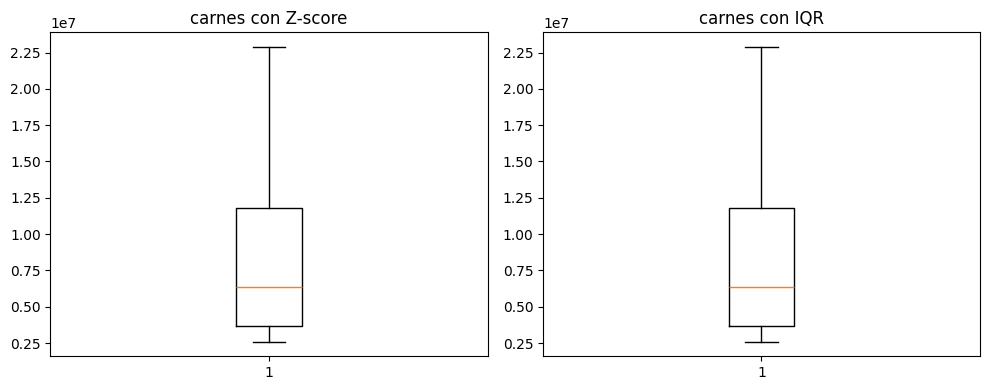

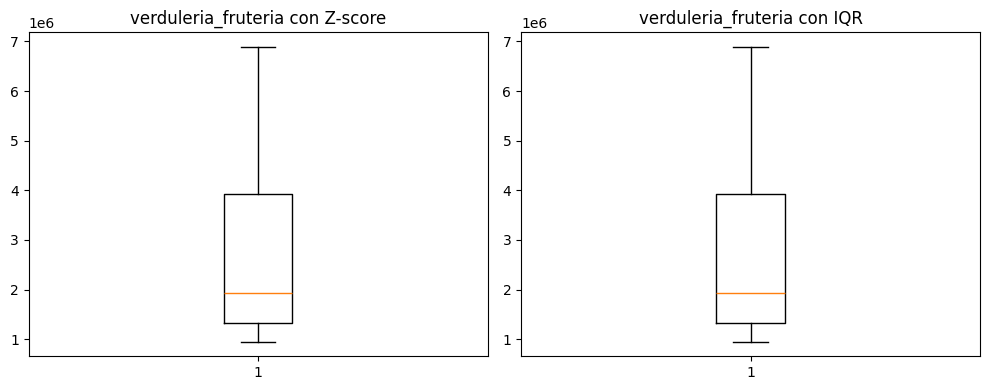

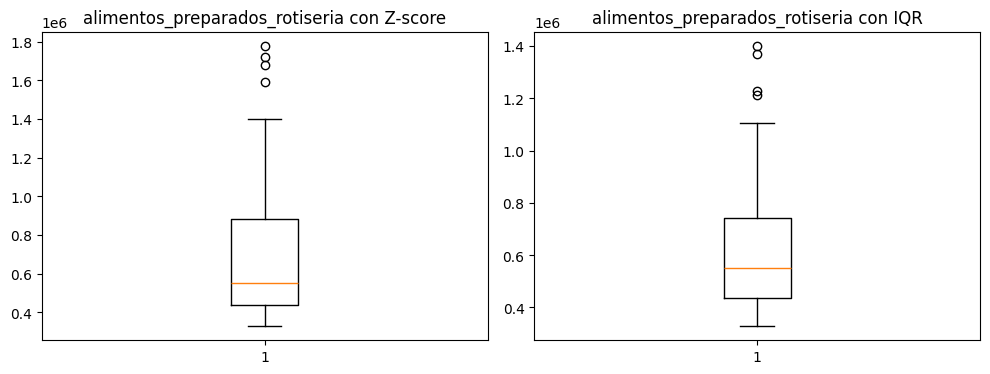

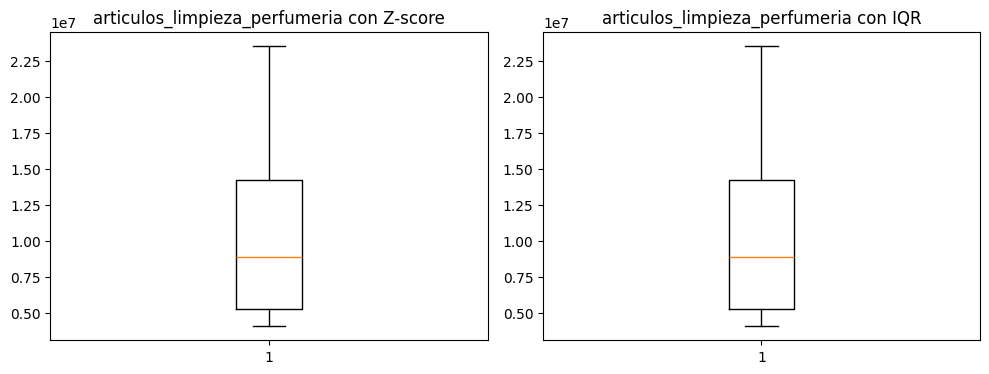

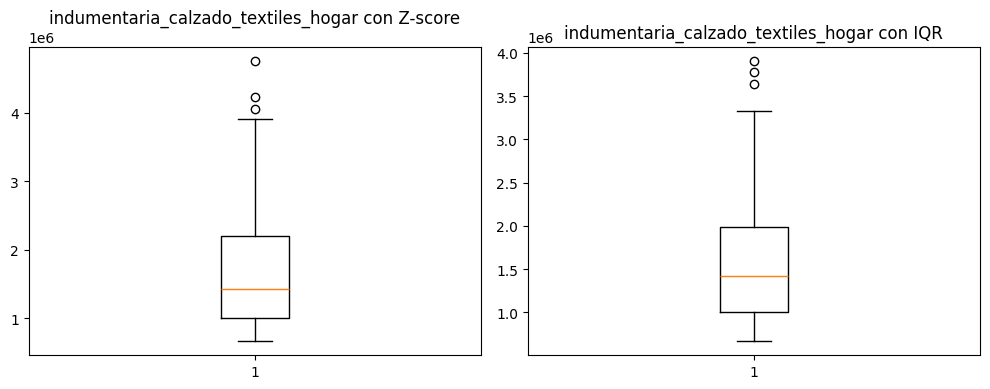

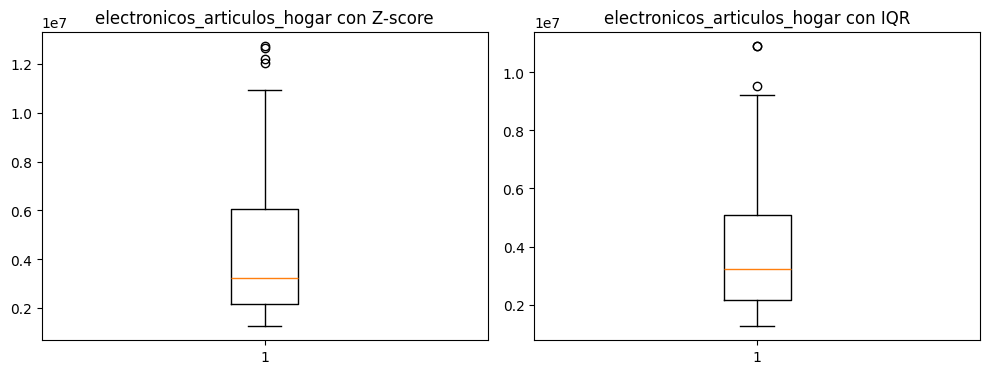

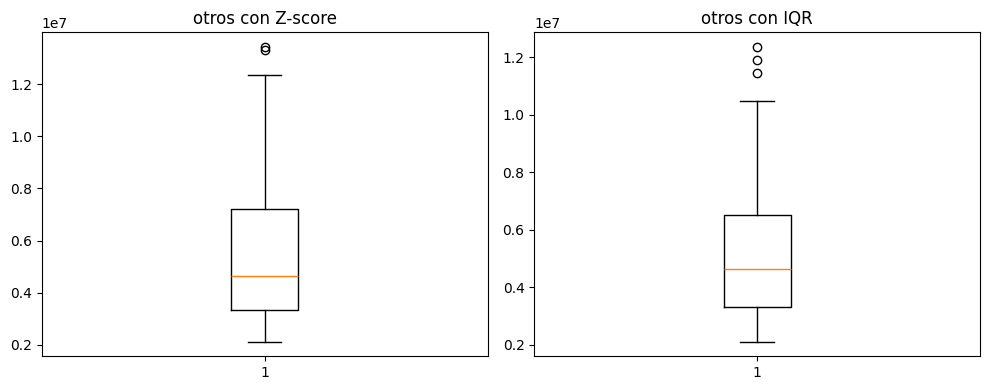

In [ ]:
num_cols = df.select_dtypes(include=["number"]).columns

# --------------------------
# Método 1: Rango Intercuartílico (IQR)
# --------------------------
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
mediana = df[num_cols].median()
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
df_iqr = df.copy()
df_iqr[num_cols] = df_iqr[num_cols].mask((df_iqr[num_cols] < lim_inf) | (df_iqr[num_cols] > lim_sup), mediana, axis=1)

# --------------------------
# Método 2: Desviación Estándar (Z-score)
# --------------------------
media = df[num_cols].mean()
std = df[num_cols].std()
mediana_z = df[num_cols].median()
z = (df[num_cols] - media) / std
df_z = df.copy()
df_z[num_cols] = df_z[num_cols].mask(z.abs() > 3, mediana_z, axis=1)


# --------------------------
# 3) Boxplots para comparar
# --------------------------
for col in num_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.boxplot(df_z[col].dropna())
    plt.title(f"{col} con Z-score")

    plt.subplot(1,2,2)
    plt.boxplot(df_iqr[col].dropna())
    plt.title(f"{col} con IQR")

    plt.tight_layout()
    plt.show()

El código hace que calcula las medidas estadísticas y la desviación estándar el cual utiliza el IQR como metodo estricto y reemplaza los outliers por la mediana. El z-score hace que detecta los valores más alla de las 3 desviaciones estandar y los reemplaza con la mediana por cada columna. Al final se hace un boxplot de todas las variables y los dos métodos para hacer comparaciones.

In [8]:
df_z.to_csv("ventas_outliers_zscore.csv", index=False)

In [9]:
df_iqr.to_csv("ventas_outliers_iqr.csv", index=False)